# Note:

    - Check that 1D time series might be represented as a sequence of matrix? -> preprocess data for Transformer
    
    - Check that it is possible to see defference between matrix? -> between raw values.

    - Try to implement simple Transformer over data

# Import libs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import sys, os
sys.path.append("../..")

In [2]:
from data.SythData import SinusoidWaves, LinearSteps
from torch.utils.data import Dataset
from sklearn.preprocessing import normalize

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torch.optim import Adam
from tqdm import tqdm
from IPython.display import clear_output

# Generate data`

In [3]:
gen_number = 256*2

In [4]:
train_data_list = \
            [LinearSteps(cps_number=250, length_data=1000, white_noise_level="min").get() for i in range(gen_number)] +\
            [LinearSteps(cps_number=200, length_data=1000, white_noise_level="min").get() for i in range(gen_number)] +\
            [LinearSteps(cps_number=50, length_data=1000, white_noise_level="min").get() for i in range(gen_number)] +\
            [LinearSteps(cps_number=25, length_data=1000, white_noise_level="min").get() for i in range(gen_number)] +\
            [LinearSteps(cps_number=20, length_data=1000, white_noise_level="min").get() for i in range(gen_number)] +\
            [LinearSteps(cps_number=10, length_data=1000, white_noise_level="min").get() for i in range(gen_number)] +\
            [LinearSteps(cps_number=5, length_data=1000, white_noise_level="min").get() for i in range(gen_number)] +\
            [LinearSteps(cps_number=2, length_data=1000, white_noise_level="min").get() for i in range(gen_number)] +\
            [SinusoidWaves(cps_number=50, length_data=1000, white_noise_level="min").get() for i in range(gen_number)] +\
            [SinusoidWaves(cps_number=25, length_data=1000, white_noise_level="min").get() for i in range(gen_number)] +\
            [SinusoidWaves(cps_number=20, length_data=1000, white_noise_level="min").get() for i in range(gen_number)] +\
            [SinusoidWaves(cps_number=1, length_data=1000, white_noise_level="min").get() for i in range(gen_number)] +\
            [LinearSteps(cps_number=50, length_data=1000).get() for i in range(gen_number)] +\
            [LinearSteps(cps_number=200, length_data=1000).get() for i in range(gen_number)] +\
            [LinearSteps(cps_number=250, length_data=1000).get() for i in range(gen_number)] +\
            [LinearSteps(cps_number=25, length_data=1000).get() for i in range(gen_number)] +\
            [LinearSteps(cps_number=20, length_data=1000).get() for i in range(gen_number)] +\
            [LinearSteps(cps_number=10, length_data=1000).get() for i in range(gen_number)] +\
            [LinearSteps(cps_number=5, length_data=1000).get() for i in range(gen_number)] +\
            [LinearSteps(cps_number=2, length_data=1000).get() for i in range(gen_number)] +\
            [LinearSteps(cps_number=1, length_data=1000, white_noise_level="max").get() for i in range(gen_number)] +\
            [LinearSteps(cps_number=40, length_data=1000, white_noise_level="max").get() for i in range(gen_number)] +\
            [SinusoidWaves(cps_number=50, length_data=1000).get() for i in range(gen_number)] +\
            [SinusoidWaves(cps_number=25, length_data=1000, white_noise_level="max").get() for i in range(gen_number)] +\
            [SinusoidWaves(cps_number=25, length_data=1000).get() for i in range(gen_number)] +\
            [SinusoidWaves(cps_number=20, length_data=1000).get() for i in range(gen_number)] +\
            [SinusoidWaves(cps_number=10, length_data=1000).get() for i in range(gen_number)] +\
            [SinusoidWaves(cps_number=5, length_data=1000).get() for i in range(gen_number)] +\
            [SinusoidWaves(cps_number=2, length_data=1000).get() for i in range(gen_number)] +\
            [SinusoidWaves(cps_number=1, length_data=1000).get() for i in range(gen_number)] +\
            [SinusoidWaves(cps_number=1, length_data=1000, white_noise_level="max").get() for i in range(gen_number)] +\
            [SinusoidWaves(cps_number=200, length_data=1000, white_noise_level="max").get() for i in range(gen_number)] +\
            [SinusoidWaves(cps_number=200, length_data=1000).get() for i in range(gen_number)] +\
            [SinusoidWaves(cps_number=200, length_data=1000, white_noise_level="min").get() for i in range(gen_number)]


test_data_list = \
            [LinearSteps(cps_number=250, length_data=1000, white_noise_level="min").get() for i in range(gen_number)] +\
            [LinearSteps(cps_number=200, length_data=1000, white_noise_level="min").get() for i in range(gen_number)] +\
            [LinearSteps(cps_number=100, length_data=1000, white_noise_level="min").get() for i in range(gen_number)] +\
            [LinearSteps(cps_number=50, length_data=1000, white_noise_level="min").get() for i in range(gen_number)] +\
            [LinearSteps(cps_number=25, length_data=1000, white_noise_level="min").get() for i in range(gen_number)] +\
            [LinearSteps(cps_number=20, length_data=1000, white_noise_level="min").get() for i in range(gen_number)] +\
            [LinearSteps(cps_number=10, length_data=1000, white_noise_level="min").get() for i in range(gen_number)] +\
            [LinearSteps(cps_number=5, length_data=1000, white_noise_level="min").get() for i in range(gen_number)] +\
            [LinearSteps(cps_number=2, length_data=1000, white_noise_level="min").get() for i in range(gen_number)] +\
            [SinusoidWaves(cps_number=50, length_data=1000, white_noise_level="min").get() for i in range(gen_number)] +\
            [SinusoidWaves(cps_number=25, length_data=1000, white_noise_level="min").get() for i in range(gen_number)] +\
            [SinusoidWaves(cps_number=20, length_data=1000, white_noise_level="min").get() for i in range(gen_number)] +\
            [SinusoidWaves(cps_number=10, length_data=1000, white_noise_level="min").get() for i in range(gen_number)] +\
            [SinusoidWaves(cps_number=10, length_data=1000).get() for i in range(gen_number)] +\
            [SinusoidWaves(cps_number=10, length_data=1000, white_noise_level="max").get() for i in range(gen_number)] +\
            [SinusoidWaves(cps_number=5, length_data=1000, white_noise_level="min").get() for i in range(gen_number)] +\
            [SinusoidWaves(cps_number=2, length_data=1000, white_noise_level="min").get() for i in range(gen_number)] +\
            [LinearSteps(cps_number=1, length_data=1000, white_noise_level="max").get() for i in range(gen_number)] +\
            [SinusoidWaves(cps_number=10, length_data=1000, white_noise_level="max").get() for i in range(gen_number)] +\
            [SinusoidWaves(cps_number=200, length_data=1000, white_noise_level="max").get() for i in range(gen_number)] +\
            [SinusoidWaves(cps_number=200, length_data=1000).get() for i in range(gen_number)] +\
            [SinusoidWaves(cps_number=200, length_data=1000, white_noise_level="min").get() for i in range(gen_number)]

# Preprocess data

Note: 

    Idea here is to concat array based on chosen sample_len, target and raw values

In [5]:
class PreprocessData:
    def __init__(self,
        ts,
        cps,
        sample_len):
        
        self.ts = ts
        self.cps = cps
        self.sample_len = sample_len

    def count_data(self) -> int:
        return self.ts.shape[0] // self.sample_len

    def divide_remainder_value(self) -> int:
        return self.ts.shape[0] % self.sample_len

    def generate_outer_ts_sample_on_remainder_value(self) -> list[int]:
        remainder_value = self.divide_remainder_value()
        out_sample_array = list(self.ts[-remainder_value:])
        zero_list = [1e-9 for i in range(abs(remainder_value - self.sample_len))]
        return out_sample_array + zero_list

    def generate_outer_cps_sample_on_remainder_value(self) -> list[int]:
        remainder_value = self.divide_remainder_value()
        out_sample_array = list(self.cps[-remainder_value:])
        zero_list = [0 for i in range(abs(remainder_value - self.sample_len))]
        return out_sample_array + zero_list

    def replace_all_zero_to_low_value(self, x) -> np.array:
        return [1e-5 if i == 0 else i for i in x]

    def transform(self) -> pd.DataFrame:
        df = pd.DataFrame()
        if self.divide_remainder_value() != 0:
            ts_transformed = list(self.ts) + self.generate_outer_ts_sample_on_remainder_value()
            cps_transformed = list(self.cps) + self.generate_outer_cps_sample_on_remainder_value()
        else:
            ts_transformed = list(self.ts)
            cps_transformed = list(self.cps)
        df['y'] = self.replace_all_zero_to_low_value(cps_transformed)
        df['x'] = normalize([np.array(ts_transformed)])[0]
        return df

In [6]:
preprocess_train_data_list = [PreprocessData(ts=df.x.values, cps=df.CPs.values, sample_len=50).transform() for df in train_data_list]

In [7]:
preprocess_test_data_list = [PreprocessData(ts=df.x.values, cps=df.CPs.values, sample_len=50).transform() for df in test_data_list]

# Prepaire data via pytorch dataset class

In [8]:
class CustomDataset(Dataset):
    def __init__(self, df_list: list[pd.DataFrame], sample_size: int):
        self.df_list = df_list
        self.sample_size = sample_size

    def extract_y_array(self, index):
        # extract CPs values and split it by sample size vector
        array = self.df_list[index]['y'].values
        # replace zeros to minumum value (increase NN stability)
        array[array == 0] = 1e-1
        return np.array([array[i*self.sample_size:i*self.sample_size+self.sample_size] for i in range(int(array.shape[0]/self.sample_size))])
        # return array

    def extract_x_array(self, index):
        # extact raw values and split it by sample size vector
        array = self.df_list[index]['x'].values
        # replace zeros to minumum value (increase NN stability)
        array[array == 0] = 1e-1
        return np.array([array[i*self.sample_size:i*self.sample_size+self.sample_size] for i in range(int(array.shape[0]/self.sample_size))])

    def __getitem__(self, index):
        array_x = self.extract_x_array(index)
        array_y = self.extract_y_array(index)
        return  torch.Tensor(array_x), torch.Tensor(array_y)

    def __len__(self):
        return len(self.df_list)

In [9]:
dataset_train = CustomDataset(df_list=preprocess_train_data_list, sample_size=50)
dataset_test = CustomDataset(df_list=preprocess_test_data_list, sample_size=50)

In [10]:
train_loader = DataLoader(dataset_train, batch_size=64, shuffle=True, num_workers=4, pin_memory=True)
test_loader = DataLoader(dataset_test, batch_size=64, shuffle=True, num_workers=4, pin_memory=True)

# Define model



    >>> encoder_layer = nn.TransformerEncoderLayer(d_model=512, nhead=8)
    >>> transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=6)

In [11]:
# class Encoder(nn.Module):
#     def __init__(self,
#                  batch_size: int = 64,
#                  n_layers: int = 4,
#                  n_heads: int = 2,
#                  max_length: int = 50,
#                  img_numbers: int = 20,
#                  length_ts: int = 1000):
#         super().__init__()

#         self.batch_size = batch_size
#         self.img_numbers = img_numbers
#         self.max_length = max_length

#         self.activation = nn.Sigmoid()
#         self.activation_train = nn.ReLU()
#         self.first_linear = nn.Linear(img_numbers*max_length, (img_numbers*max_length)//2)
#         self.second_linear = nn.Linear((img_numbers*max_length)//2, (img_numbers*max_length)//4)
#         self.out_linear = nn.Linear((img_numbers*max_length)//4, length_ts)
#         self.encoder_layer = nn.TransformerEncoderLayer(d_model=max_length, nhead=n_heads)
#         self.encoder = nn.TransformerEncoder(self.encoder_layer, num_layers=n_layers)


#     def forward(self, x):
#         y_0 = self.encoder(x).flatten().reshape(self.batch_size, self.img_numbers*self.max_length)
#         y_1 = self.activation_train(self.first_linear(y_0))
#         y_2 = self.activation_train(self.second_linear(y_1))
#         y_3 = self.activation_train(self.out_linear(y_2))
#         return self.activation(y_3)

In [12]:
class TransformerCPD(nn.Module):
    def __init__(self,
                 n_layers_encoder: int = 6,
                 n_layers_decoder: int = 6,
                 n_heads: int = 10,
                 max_length: int = 50):
        super().__init__()

        self.max_length = max_length

        self.activation = nn.Sigmoid()
        
        encoder_layer = nn.TransformerEncoderLayer(d_model=max_length, nhead=n_heads)
        decoder_layer = nn.TransformerDecoderLayer(d_model=max_length, nhead=n_heads)
        
        self.encoder = nn.TransformerEncoder(encoder_layer, num_layers=n_layers_encoder)
        self.decoder = nn.TransformerDecoder(decoder_layer, num_layers=n_layers_decoder)

    @torch.inference_mode()
    def encode(self, x):
        """ Encode time series to a map of features.

        Arg:
            x: batch of raw time series data.
            
        Return:
            batch of encoded time series data.
        """
        return self.encoder(x)

    def forward(self, x):
        encoded_data = self.encoder(x)
        decoded_data = self.decoder(tgt=x, memory=encoded_data)
        return self.activation(decoded_data)

In [13]:
# TransformerCPD()

In [14]:
# torch_list_diagonals = torch.tensor(list_diagonals, dtype=torch.double).view(1, 100, 50)

In [15]:
# torch_list_diagonals.to(dtype=torch.double)

# Check that model works with data

In [16]:
def train(model):
    model.train()

    train_loss = 0
    batch_size = 64
    for x, y in tqdm(train_loader, desc='Train'):
        
        x = x.to(device)

        optimizer.zero_grad()

        output = model(x)

        loss = loss_fn(y, output)

        train_loss += loss.detach().item()

        loss.backward()
        optimizer.step()
        
        del loss
        del output

    train_loss /= len(train_loader)

    return train_loss

In [17]:
@torch.inference_mode()
def evaluate(model, loader):
    model.eval()

    total_loss = 0

    for x, y in tqdm(loader, desc='Evaluation'):
        x = x.to(device)

        output = model(x)

        loss = loss_fn(y, output)

        total_loss += loss.detach().item()

        del loss
        del output

    total_loss /= len(loader)

    return total_loss

In [18]:
def plot_stats(
    train_loss: list[float],
    valid_loss: list[float],
    title: str
):
    plt.figure(figsize=(16, 8))

    plt.title(title + ' loss')

    plt.plot(train_loss, label='Train loss')
    plt.plot(valid_loss, label='Test loss')
    plt.legend()
    plt.grid()

    plt.show()

In [19]:
def whole_train_valid_cycle(model, num_epochs, title):
    train_loss_history = []
    test_loss_history = []

    for epoch in range(num_epochs):
        train_loss = train(model)
        test_loss = evaluate(model, test_loader)

        train_loss_history.append(train_loss)
        test_loss_history.append(test_loss)

        clear_output(wait=True)

        plot_stats(
            train_loss_history,
            test_loss_history,
            title
        )

# SetupModel

In [20]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

loss_fn = nn.MSELoss()

cpu


In [21]:
model = TransformerCPD(max_length=50).to(device)
optimizer = Adam(model.parameters(), lr=1e-3)

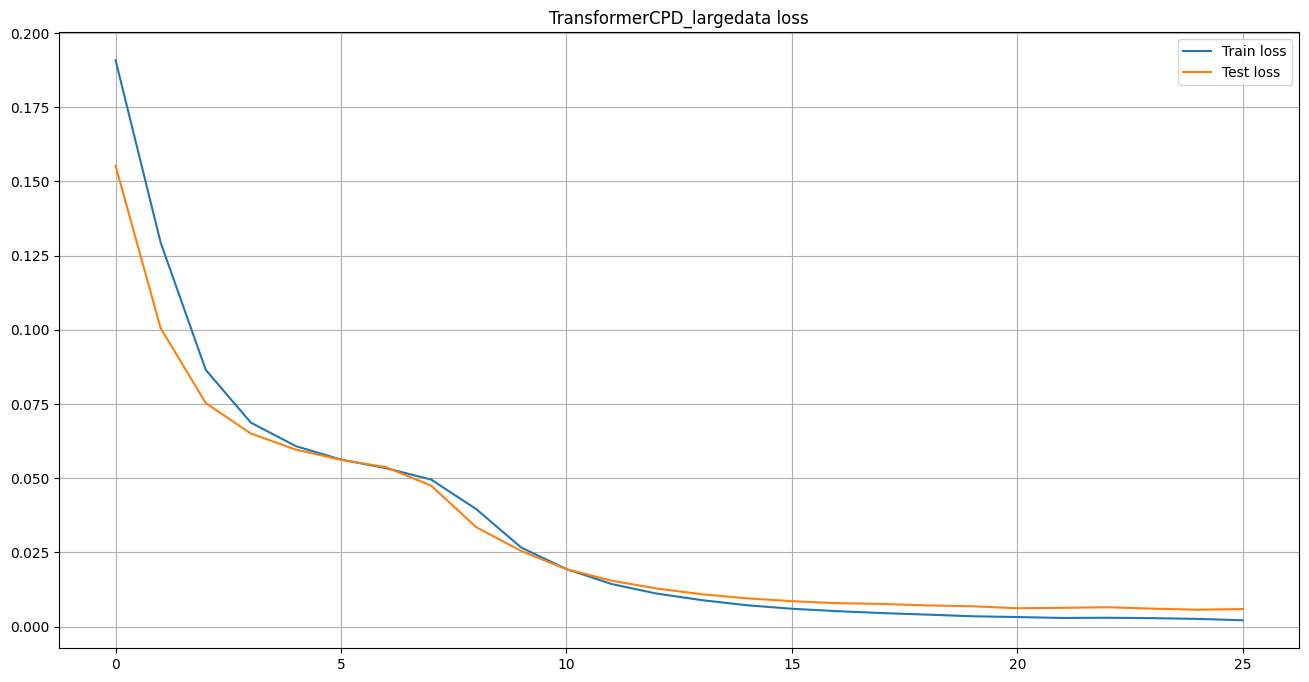

Train:  20%|███████████████████████████████████▏                                                                                                                                          | 55/272 [00:18<01:12,  3.00it/s]


KeyboardInterrupt: 

In [22]:
whole_train_valid_cycle(model, 50, 'TransformerCPD_largedata')

In [23]:
x_test, y_test = next(iter(test_loader))

In [24]:
with torch.no_grad():
    test_out = model(x_test)

In [43]:
array_out_numpy = test_out[63].detach().numpy()

In [44]:
array_y_numpy = y_test[63].detach().numpy()

In [45]:
predicted_test = np.round(array_out_numpy.flatten())

In [46]:
original_test = np.round(array_y_numpy.flatten())

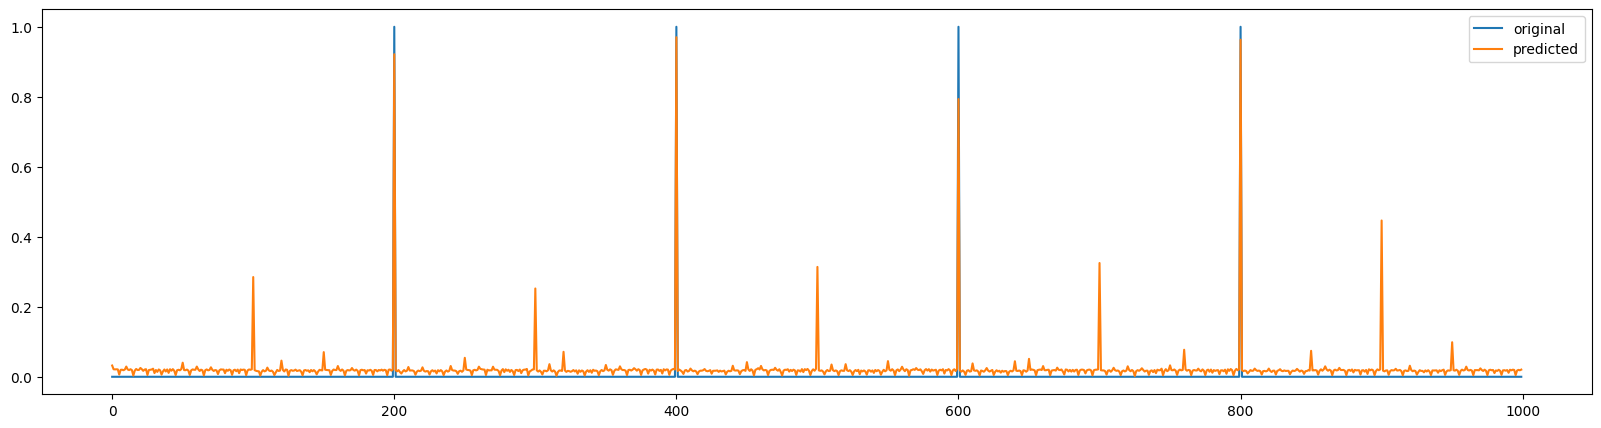

In [47]:
plt.figure(figsize=(20,5))
plt.plot(original_test, label='original')
plt.plot(array_out_numpy.flatten(), label='predicted')
plt.legend()

In [30]:
model_scripted = torch.jit.script(model) # Export to TorchScript
model_scripted.save('../../models/transfomer_cpd_large_syth_data.pt') # Save

/home/gishb/.local/lib/python3.10/site-packages/torch/jit/_recursive.py:240: UserWarning: 'batch_first' was found in ScriptModule constants, but was not actually set in __init__. Consider removing it.
  warnings.warn("'{}' was found in ScriptModule constants, "
